<a href="https://colab.research.google.com/github/tylee33/DLforFinance/blob/master/12_month_SMA_vs_Buy_and_Hold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
    name = fn, length = len(uploaded[fn])))

In [0]:
%matplotlib inline

import pandas as pd
from datetime import datetime 
from matplotlib.ticker import FuncFormatter

pd.options.mode.chained_assignment = None

def money(x, pos):
    'The two args are the value and tick position'
    return "${:,.0f}".format(x)

money_formatter = FuncFormatter(money)

In [0]:
# SMA(Simple Moving Average)
def backtest(sp500):
    'Backtest a dataset using the SMA strategy'
    initial_value = 100
    
    sp500['Criteria'] = sp500['Adj Close'] >= sp500['SMA 365']  
    sp500['Buy & Hold'] = initial_value * (1 + sp500['Pct Change']).cumprod()
    sp500['Trend'] = initial_value * (1 + ( sp500['Criteria'].shift(1) * sp500['Pct Change'] )).cumprod() 
    
    sp500 = sp500.dropna()
    start = sp500.index.min()
    end = sp500.index.max()
    
    # Plot graph
    ax = sp500[['Trend', 'Buy & Hold']].plot(grid=True, kind='line', title="Trend (12 month SMA) vs. Buy & Hold\n{} -  {}".format(start.year, end.year), logy=True, figsize=(12, 6))
    ax.yaxis.set_major_formatter(money_formatter)

    # Print end stats
    portfolio_value = sp500.iloc[-1]['Trend']
    benchmark_value = sp500.iloc[-1]['Buy & Hold']
    years = ((end.year - start.year - 2) * 12 + end.month - 1 + (13-start.month) ) / 12.00
    portfolio_return = (((portfolio_value / 100.00) ** (1.00/years)) - 1) * 100.00
    benchmark_return = (((benchmark_value / 100.00) ** (1.00/years)) - 1) * 100.00
    
    text = 'Portfolio value: ${:,.0f} ({:,.2f}%)'.format(portfolio_value, portfolio_return)
    text += "\n" + 'Benchmark value: ${:,.0f} ({:,.2f}%)'.format(benchmark_value, benchmark_return)
    ax.text(0.98, 0.04, text,
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=12)

    return

In [3]:
sp500 = pd.read_csv('SP500.csv', sep=',', parse_dates=True, index_col='Date', usecols=['Adj Close', 'Date'])
sp500.head()

,Adj Close
Date,
1950-01-03,16.66
1950-01-04,16.85
1950-01-05,16.93
1950-01-06,16.98
1950-01-09,17.08


In [4]:
sp500['Pct Change'] = sp500['Adj Close'].pct_change()
sp500['SMA 365'] = sp500['Adj Close'].rolling(window=365).mean()
sp500.dropna().head()

,Adj Close,Pct Change,SMA 365
Date,,,
1951-06-18,22.049999,0.000454,19.447726
1951-06-19,22.020000,-0.001360,19.462411
1951-06-20,21.910000,-0.004995,19.476274
1951-06-21,21.780001,-0.005933,19.489562
1951-06-22,21.549999,-0.010560,19.502082


In [5]:
sp500['Criteria'] = sp500['Adj Close'] >= sp500['SMA 365']  
sp500['Criteria'].value_counts()

True     12756
False     4686
Name: Criteria, dtype: int64

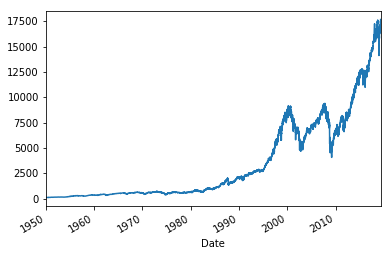

In [6]:
(100 * (1 + sp500['Pct Change']).cumprod()).plot()

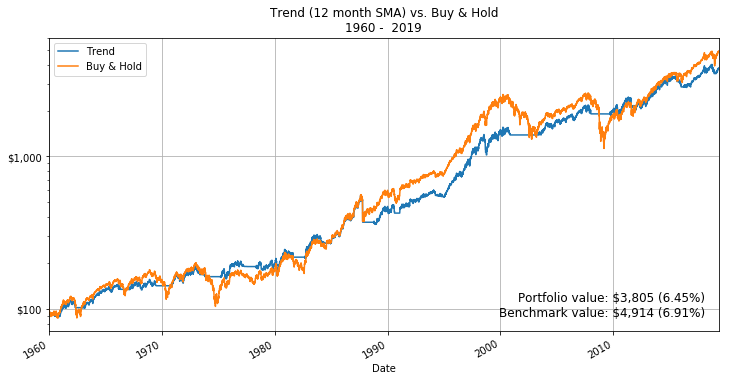

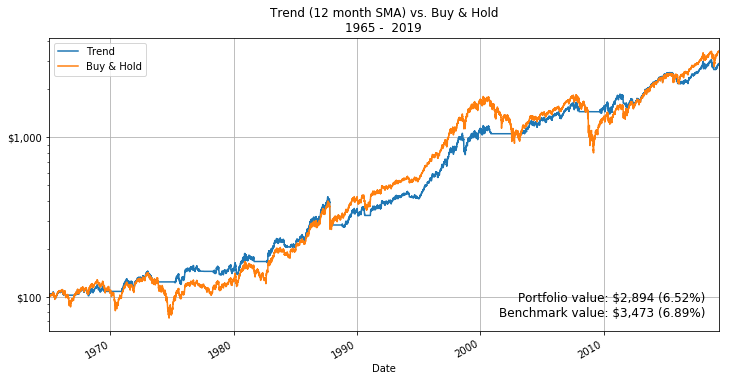

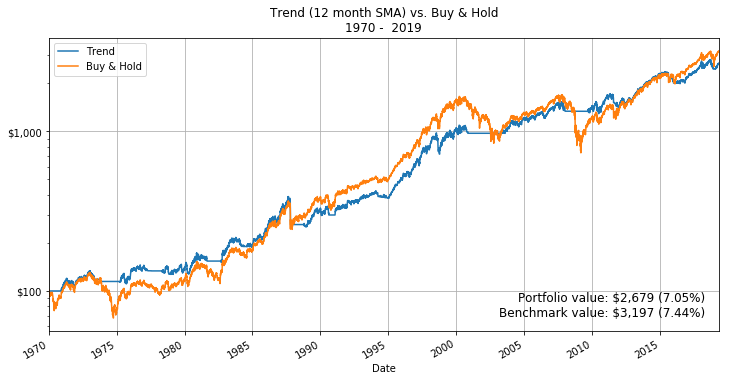

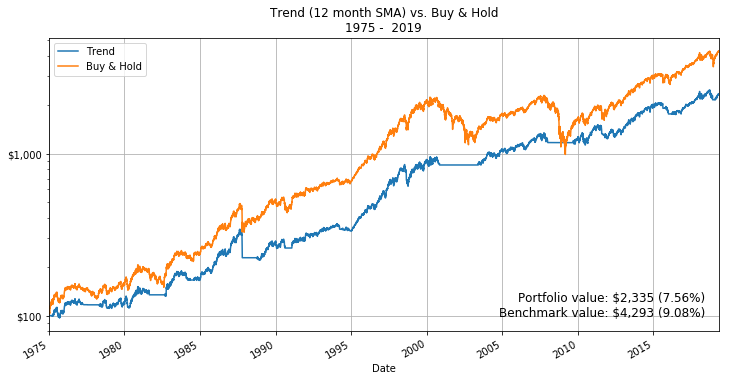

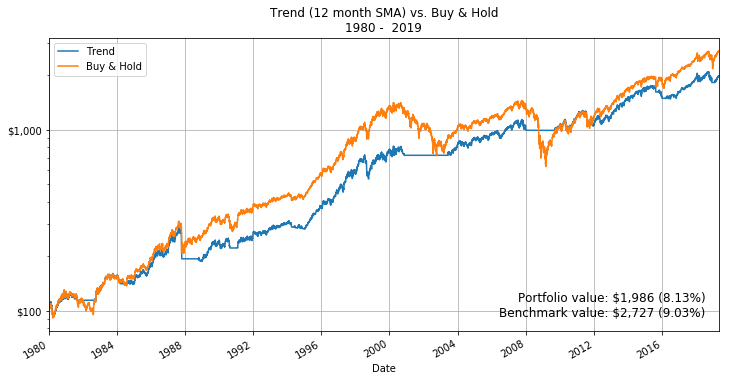

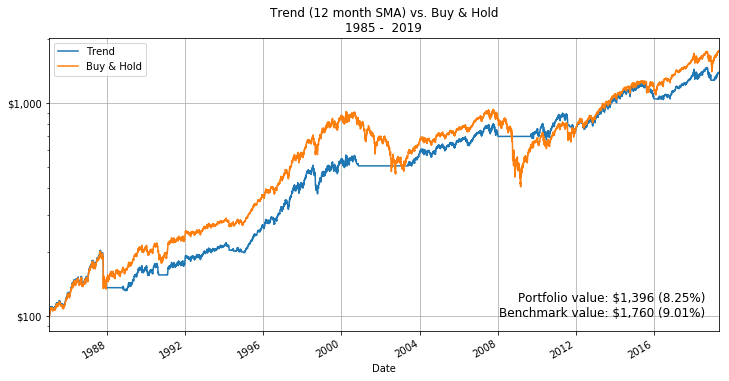

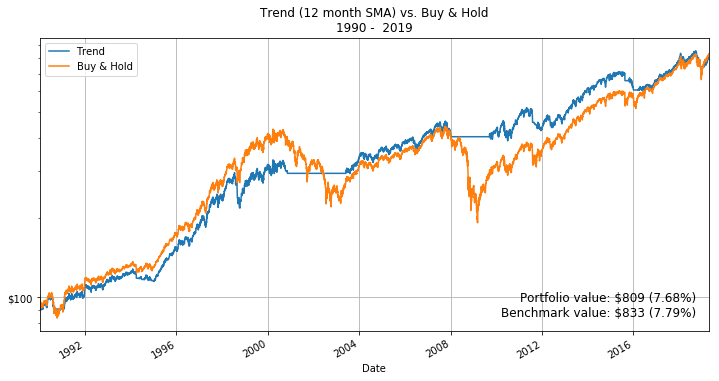

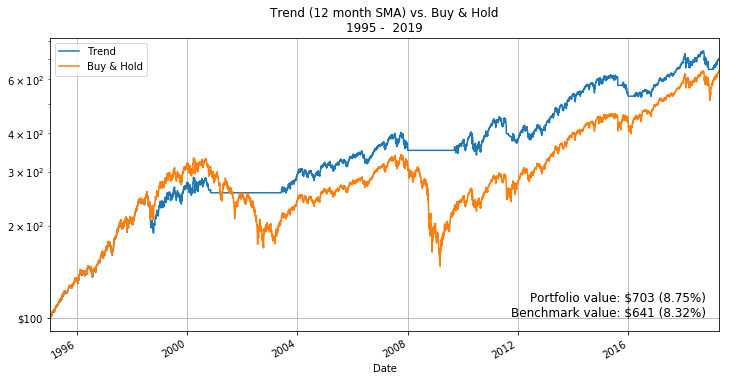

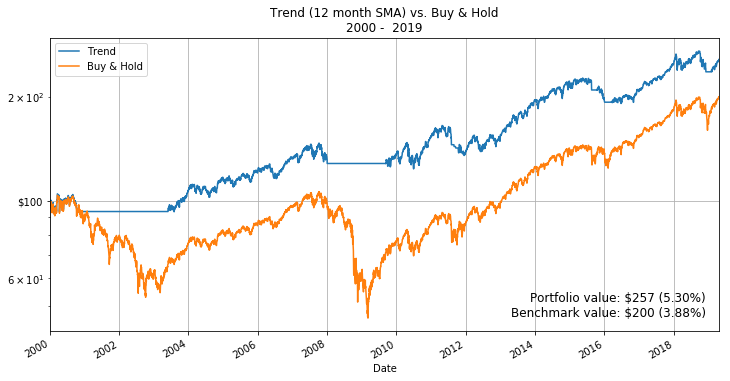

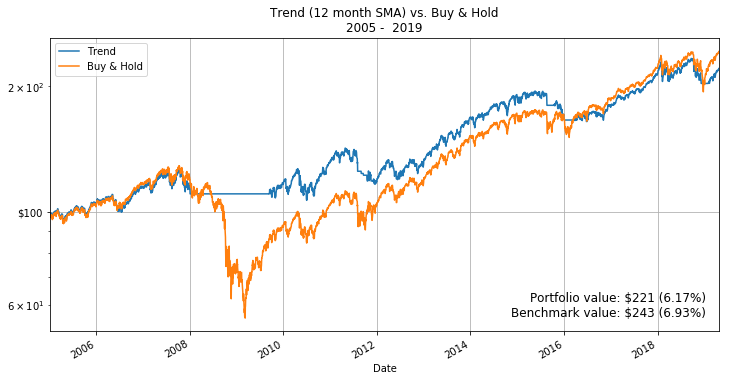

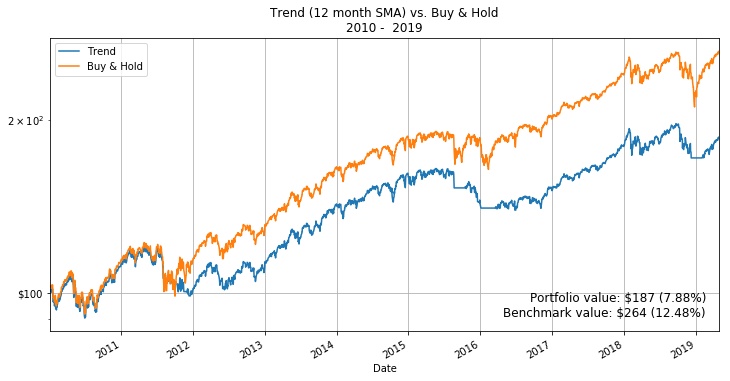

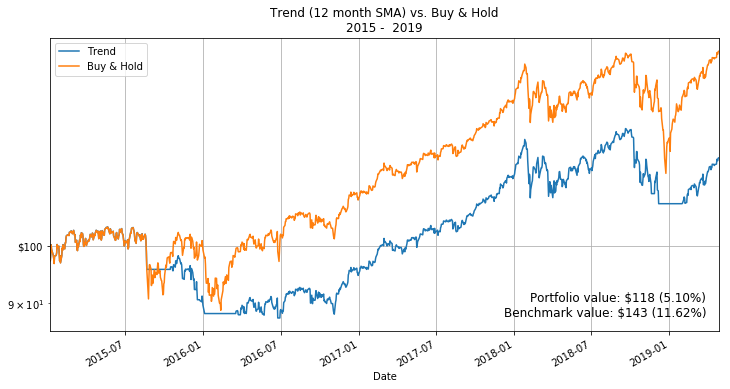

In [7]:
year = 1960
while(year <= 2018):
    backtest(sp500[datetime(year, 1, 1):])
    year += 5